In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
%matplotlib inline
plt.rc('figure', figsize=(16, 10))
plt.rc('figure', facecolor='white')

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()
X = iris.data
y = iris.target

In [7]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [8]:
from sklearn.svm import SVC

In [9]:
svc = SVC()

In [10]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.4, random_state=3)

In [17]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
expected = svc.predict(X_test)
actual = y_test

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(expected, actual)

0.96666666666666667

In [21]:
from sklearn import svm

In [22]:
X = iris.data[:,:2]
y = iris.target

In [23]:
C = 1.

In [24]:
svc = svm.SVC(kernel='linear', C=C).fit(X,y)

In [25]:
rbf_svc = svm.SVC(kernel='rbf', gamma=.7, C=C).fit(X,y)

In [26]:
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X,y)

In [27]:
linear_svc = svm.LinearSVC(C=C).fit(X,y)

In [28]:
step_size = .02

x_axis_min = X[:,0].min() - 1
x_axis_max = X[:,0].max() + 1

y_axis_min = X[:,1].min() - 1
y_axis_max = X[:,1].max() + 1

In [29]:
xx, yy = np.meshgrid(np.arange(x_axis_min, x_axis_max, step_size), np.arange(y_axis_min, y_axis_max, step_size))

In [30]:
xx

array([[ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88],
       [ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88],
       [ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88],
       ..., 
       [ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88],
       [ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88],
       [ 3.3 ,  3.32,  3.34, ...,  8.84,  8.86,  8.88]])

In [31]:
yy

array([[ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ],
       [ 1.02,  1.02,  1.02, ...,  1.02,  1.02,  1.02],
       [ 1.04,  1.04,  1.04, ...,  1.04,  1.04,  1.04],
       ..., 
       [ 5.34,  5.34,  5.34, ...,  5.34,  5.34,  5.34],
       [ 5.36,  5.36,  5.36, ...,  5.36,  5.36,  5.36],
       [ 5.38,  5.38,  5.38, ...,  5.38,  5.38,  5.38]])

In [32]:
plot_titles = ['SVC w/ linear kernel', 'LinearSVC (linear kernel)', 'SVC w/ RBF kernel', 'SVC w/ 3rd deg. polynomial kernel']

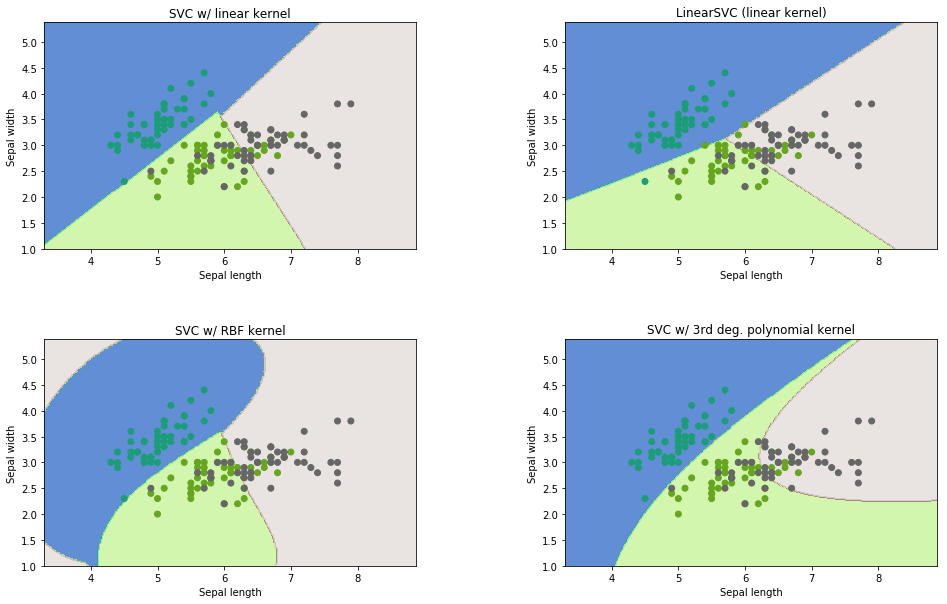

In [39]:
for i, model in enumerate([svc, linear_svc, rbf_svc, poly_svc]):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=.4, hspace=.4)
    
    pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = pred.reshape(xx.shape)
    
    plt.contourf(xx, yy, pred, cmap=plt.cm.terrain, alpha=.7, linewidth=.3)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Dark2)
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks()
    plt.yticks()
    plt.title(plot_titles[i])